In [2]:
from other_methods_implemenations  import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_data(n, m = 20):
    df = pd.DataFrame(np.random.randn(n, m)).add_prefix('feat_')
    df['marg'] = (np.random.randn(n) *1 + df.iloc[:,-1:].T.values[0] *99) / 100
    return df*100

c:\Users\mikol\Desktop\Master thesis\mcut_feature_selection\mcut_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
res = pd.Series()
df = create_data(1000)
mcut_feature_selection(df, 3, 'marg', np.mean, 7, mcut, 0, 100, 5)
for n in range(10000, 100000, 1000):
    for i in range(30):
        df = create_data(n)
        start = pd.Timestamp.now(tz = 'cet')
        feats = mcut_feature_selection(df, 3, 'marg', np.mean, 5, mcut, 0, 100, 5)
        res.loc[f'{n}_{i}'] = ((pd.Timestamp.now(tz = 'cet') - start).total_seconds(), len(feats), feats)
    

Max condition is abs(mono)>0.6499999999999999
Number of features is 20
I saved it as 'results'.
I saved importantn features due to the Lasso regression as an attribute 'important_features'.


In [18]:
# res.to_pickle('../experiments_results/experiment_1_results.pkl')
res = pd.read_pickle('../experiments_results/experiment_1_results.pkl')

In [19]:
# res.index = [int(i.split('_')[0]) for i in res.index]

In [20]:
import statsmodels.api as sm
data = res.groupby(res.index).apply(lambda x: x.str[0].mean()).tail(-10)
model = sm.OLS(data.values, sm.add_constant(np.array(data.index.astype(float)))).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1352.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           8.73e-55
Time:                        20:56:25   Log-Likelihood:                 213.74
No. Observations:                  89   AIC:                            -423.5
Df Residuals:                      87   BIC:                            -418.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2231      0.006     40.175      0.000       0.212       0.234
x1          3.363e-06   9.15e-08     36.766      0.000    3.18e-06    3.54e-06
==============================================================================
Omnibus:                       16.035   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.429
Skew:                           1.079   Prob(JB):                     9.96e-05
Kurtosis:                       3.561   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model.params

array([2.23066414e-01, 3.36284127e-06])

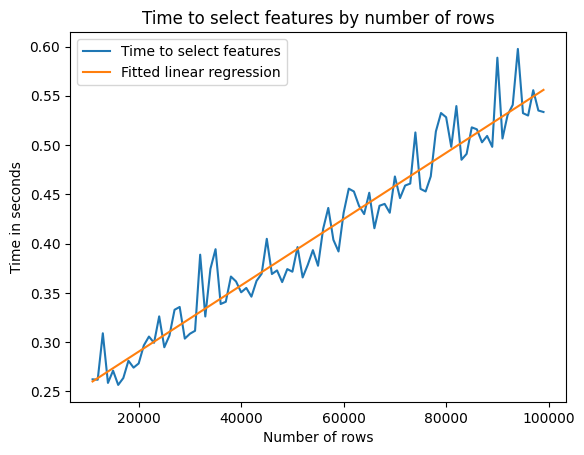

In [23]:
res.groupby(res.index).apply(lambda x: x.str[0].mean()).rolling(1).mean().tail(-10).plot()
plt.title('Time to select features by number of rows')
plt.xlabel('Number of rows')
plt.ylabel('Time in seconds')

plt.plot(data.index, model.params[1]*data.index + model.params[0])

plt.legend(['Time to select features', 'Fitted linear regression'])

# plt.savefig('../charts/exp1.png', format='png')
